# 3 Feature Engineering & Random Forest

In [22]:
%matplotlib inline
import numpy as np
import pandas as pd
import math
import random

In [23]:
rawData2015 = pd.DataFrame.from_csv('complete2015Data.csv')

/Applications/Anaconda/anaconda/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2825: DtypeWarning: Columns (20,30) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


In [24]:
print(rawData2015.columns)

Index(['index', 'FL_DATE', 'UNIQUE_CARRIER', 'TAIL_NUM', 'FL_NUM', 'ORIGIN',
       'DEST', 'CRS_DEP_TIME', 'DEP_TIME', 'DEP_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'WHEELS_ON', 'TAXI_IN', 'CRS_ARR_TIME', 'ARR_TIME',
       'ARR_DELAY', 'CANCELLED', 'DIVERTED', 'CANCELLATION_CODE', 'AIR_TIME',
       'DISTANCE', 'CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY',
       'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY', 'ORIGIN_CITY_NAME',
       'DEST_CITY_NAME', 'AIRCRAFT_YEAR', 'AIRCRAFT_MFR', 'LAT', 'LONG'],
      dtype='object')


In [25]:
rawData2015.shape

(5819079, 33)

## 3.1 Cleaning the raw dataset

We will focus on flights between Boston and LA. When cleaning the data set, we have to remove the following entries:

- Flights that have been cancelled or diverted.
- Meaningfluness data columns
- Rows with NaN value
- Flights' destination or origin do not correspond to our need


In [26]:
#entries to be dropped in the analysis
columns_dropped = ['index', 'TAIL_NUM', 'FL_NUM', 'DEP_TIME', 'DEP_DELAY', 'TAXI_OUT', 'WHEELS_OFF', \
                   'WHEELS_ON', 'TAXI_IN', 'ARR_TIME', 'CANCELLED', 'CANCELLATION_CODE', 'AIR_TIME', \
                   'CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY']

In [27]:
data15 = rawData2015.copy().drop(columns_dropped, axis =1, inplace=True)

We focus on the flight from Boston and New York to Los Angeles. The airport code is corresponing 'BOS', 'JFK', 'EWR' and 'LAX'.

In [47]:
dexample = rawData2015[rawData2015.DEST == 'ORD'][(rawData2015.ORIGIN == 'JFK') | (rawData2015.ORIGIN == 'LGA') | (rawData2015.ORIGIN == 'EWR')].copy()

/Applications/Anaconda/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


In [48]:
print (len(dexample))                                         
dexample.head(3)

16459


,index,FL_DATE,UNIQUE_CARRIER,TAIL_NUM,FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,...,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,ORIGIN_CITY_NAME,DEST_CITY_NAME,AIRCRAFT_YEAR,AIRCRAFT_MFR,LAT,LONG
4413,4413,2015-01-01,AA,N3FHAA,190,JFK,ORD,800,801.0,1.0,...,NaN,NaN,NaN,NaN,"New York, NY","Chicago, IL",NaN,NaN,40.633333,-73.783333
4414,4414,2015-01-02,AA,N3DAAA,190,JFK,ORD,800,801.0,1.0,...,NaN,NaN,NaN,NaN,"New York, NY","Chicago, IL",NaN,NaN,40.633333,-73.783333
4415,4415,2015-01-03,AA,N3BFAA,190,JFK,ORD,800,803.0,3.0,...,NaN,NaN,NaN,NaN,"New York, NY","Chicago, IL",NaN,NaN,40.633333,-73.783333


In [60]:
dexample1 = dexample.copy().drop(columns_dropped, axis =1)

In [61]:
dexample1.head(10)

,FL_DATE,UNIQUE_CARRIER,ORIGIN,DEST,CRS_DEP_TIME,CRS_ARR_TIME,ARR_DELAY,DIVERTED,DISTANCE,ORIGIN_CITY_NAME,DEST_CITY_NAME,AIRCRAFT_YEAR,AIRCRAFT_MFR,LAT,LONG
4413,2015-01-01,AA,JFK,ORD,800,955,2.0,0.0,740.0,"New York, NY","Chicago, IL",NaN,NaN,40.633333,-73.783333
4414,2015-01-02,AA,JFK,ORD,800,955,10.0,0.0,740.0,"New York, NY","Chicago, IL",NaN,NaN,40.633333,-73.783333
4415,2015-01-03,AA,JFK,ORD,800,955,9.0,0.0,740.0,"New York, NY","Chicago, IL",NaN,NaN,40.633333,-73.783333
4416,2015-01-04,AA,JFK,ORD,800,955,33.0,0.0,740.0,"New York, NY","Chicago, IL",NaN,NaN,40.633333,-73.783333
4417,2015-01-05,AA,JFK,ORD,800,955,41.0,0.0,740.0,"New York, NY","Chicago, IL",NaN,NaN,40.633333,-73.783333
4418,2015-01-06,AA,JFK,ORD,759,952,-7.0,0.0,740.0,"New York, NY","Chicago, IL",NaN,NaN,40.633333,-73.783333
4419,2015-01-07,AA,JFK,ORD,759,952,-21.0,0.0,740.0,"New York, NY","Chicago, IL",NaN,NaN,40.633333,-73.783333
4420,2015-01-08,AA,JFK,ORD,759,952,13.0,0.0,740.0,"New York, NY","Chicago, IL",NaN,NaN,40.633333,-73.783333
4421,2015-01-09,AA,JFK,ORD,759,952,36.0,0.0,740.0,"New York, NY","Chicago, IL",NaN,NaN,40.633333,-73.783333
4422,2015-01-10,AA,JFK,ORD,759,952,-11.0,0.0,740.0,"New York, NY","Chicago, IL",NaN,NaN,40.633333,-73.783333


In [62]:
dexample1.groupby('UNIQUE_CARRIER').size()

UNIQUE_CARRIER
AA    6247
B6    1034
DL      33
MQ     499
NK     730
OO     105
UA    7811
dtype: int64

In [63]:
# In case we want to tackle a broader case, we can use this function. The droplist can be any list of carrier.
def restrict_carrier(data, droplist):
    for item in droplist:
        data.drop(data[data.UNIQUE_CARRIER == item].index, inplace= True)
    return 

In [64]:
drop_airline = [ 'AS','DL', 'EV', 'F9', 'FL', 'HA', 'MQ', 'US', 'VX', 'WN']
restrict_carrier(dexample1, drop_airline)

### Extracting month and day

In [65]:
from time import strptime
days = {0:"Mon", 1:"Tues", 2:"Wed", 3:"Thurs", 4:"Fri", 5:"Sat", 6:"Sun"}
months = {1:"Jan", 2:"Feb", 3:"Mar", 4:"Apr", 5:"May", 6:"June", 7:"July", 8:"Aug", 9:"Sep", \
          10:"Oct", 11:"Nov", 12:"Dec"}

In [66]:
def adjust_time(data):
    monlist = np.empty(len(data), dtype = str)
    daylist = np.empty(len(data), dtype = str)
    
    for i in range(len(data)):
        date= strptime(data.FL_DATE.iloc[i], "%Y-%M-%d")
        monlist[i] = months[date.tm_min]
        daylist[i] = days[date.tm_wday]

    return monlist, daylist

In [67]:
# now add the weekday and the month columns created by the adjust_time
monlist, daylist = adjust_time(dexample1)
print ("OK")
dexample1['MONTH'] = pd.Series(monlist, index=dexample1.index)
dexample1['DAY'] = pd.Series(daylist, index=dexample1.index)
if 'FL_DATE' in dexample1.columns:
    dexample1.drop('FL_DATE', axis = 1, inplace= True)
print (dexample1.columns)

OK
Index(['UNIQUE_CARRIER', 'ORIGIN', 'DEST', 'CRS_DEP_TIME', 'CRS_ARR_TIME',
       'ARR_DELAY', 'DIVERTED', 'DISTANCE', 'ORIGIN_CITY_NAME',
       'DEST_CITY_NAME', 'AIRCRAFT_YEAR', 'AIRCRAFT_MFR', 'LAT', 'LONG',
       'MONTH', 'DAY'],
      dtype='object')


### Change the time formate

Let's change teh format of all time entries. Instead of having hour : minute, we convert everything in minutes

In [68]:
%%time
ti = lambda x : x/100 + x % 100
dexample1['CRS_ARR_TIME_COR'] = dexample1.CRS_ARR_TIME.map(ti)
dexample1['CRS_DEP_TIME_COR'] = dexample1.CRS_DEP_TIME.map(ti)
dexample1.drop(['CRS_DEP_TIME', 'CRS_ARR_TIME'], axis = 1, inplace = True)

CPU times: user 36 ms, sys: 3.18 ms, total: 39.1 ms
Wall time: 42 ms


### Data Normalization

For getting better result from the regression model, we need to normalize the data collecting. The idea of our normalization is that if the variation of one feature A is higher than feature B, we believe the variation of A may completely contains the variation of B, which means feature B is less useful for the prediction model.

In [69]:
def normalize(array):
    mean = np.mean(array)
    std = np.std(array)
    return [(x - mean)/std for x in array]

In [70]:
def normalize_data(data, feature_list):
    for feature in feature_list:
        if feature in data.columns:
            data[feature + '_NOR'] = normalize(data[feature].values)
            data.drop(feature, axis =1, inplace=True)
    return

In [42]:
dexample2 = dexample1

In [19]:
dexample1.head(5)

,UNIQUE_CARRIER,ORIGIN,DEST,ARR_DELAY,DIVERTED,DISTANCE,ORIGIN_CITY_NAME,DEST_CITY_NAME,AIRCRAFT_YEAR,AIRCRAFT_MFR,LAT,LONG,MONTH,DAY,CRS_ARR_TIME_COR,CRS_DEP_TIME_COR
0,AA,JFK,LAX,7.0,0.0,2475.0,"New York, NY","Los Angeles, CA",NaN,NaN,40.633333,-73.783333,J,T,42.3,9.0
1,AA,JFK,LAX,-19.0,0.0,2475.0,"New York, NY","Los Angeles, CA",1959,BEECH,40.633333,-73.783333,J,F,42.3,9.0
2,AA,JFK,LAX,-39.0,0.0,2475.0,"New York, NY","Los Angeles, CA",NaN,NaN,40.633333,-73.783333,J,S,42.3,9.0
3,AA,JFK,LAX,-12.0,0.0,2475.0,"New York, NY","Los Angeles, CA",1979,BEECH,40.633333,-73.783333,J,S,42.3,9.0
4,AA,JFK,LAX,-8.0,0.0,2475.0,"New York, NY","Los Angeles, CA",NaN,NaN,40.633333,-73.783333,J,M,42.3,9.0


In [71]:
dexample2 = dexample1.fillna(0)

In [72]:
dexample2.head()

,UNIQUE_CARRIER,ORIGIN,DEST,ARR_DELAY,DIVERTED,DISTANCE,ORIGIN_CITY_NAME,DEST_CITY_NAME,AIRCRAFT_YEAR,AIRCRAFT_MFR,LAT,LONG,MONTH,DAY,CRS_ARR_TIME_COR,CRS_DEP_TIME_COR
4413,AA,JFK,ORD,2.0,0.0,740.0,"New York, NY","Chicago, IL",0,0,40.633333,-73.783333,J,T,64.55,8.0
4414,AA,JFK,ORD,10.0,0.0,740.0,"New York, NY","Chicago, IL",0,0,40.633333,-73.783333,J,F,64.55,8.0
4415,AA,JFK,ORD,9.0,0.0,740.0,"New York, NY","Chicago, IL",0,0,40.633333,-73.783333,J,S,64.55,8.0
4416,AA,JFK,ORD,33.0,0.0,740.0,"New York, NY","Chicago, IL",0,0,40.633333,-73.783333,J,S,64.55,8.0
4417,AA,JFK,ORD,41.0,0.0,740.0,"New York, NY","Chicago, IL",0,0,40.633333,-73.783333,J,M,64.55,8.0


In [ ]:
dexample2.drop(dexample2[dexample2.AIRCRAFT_YEAR =='0'].index, inplace = True)
dexample2['AIRCRAFT_YEAR_COR'] = dexample2.AIRCRAFT_YEAR.map(lambda x: int(x))
dexample2.drop('AIRCRAFT_YEAR', axis = 1, inplace = True)

In [135]:
normalize_data(dexample2, ['DISTANCE', 'LAT', 'LONG', 'CRS_ARR_TIME_COR', 'CRS_DEP_TIME_COR', 'AIRCRAFT_YEAR_COR'])

In [136]:
dexample2.head(3)

,UNIQUE_CARRIER,ORIGIN,DEST,ARR_DELAY,DIVERTED,ORIGIN_CITY_NAME,DEST_CITY_NAME,AIRCRAFT_MFR,MONTH,DAY,DISTANCE_NOR,LAT_NOR,LONG_NOR,CRS_ARR_TIME_COR_NOR,CRS_DEP_TIME_COR_NOR,AIRCRAFT_YEAR_COR_NOR
4413,AA,JFK,ORD,2.0,0.0,"New York, NY","Chicago, IL",0,J,T,1.422153,-2.177843,1.06908,1.03016,-1.246569,-1.221363
4414,AA,JFK,ORD,10.0,0.0,"New York, NY","Chicago, IL",0,J,F,1.422153,-2.177843,1.06908,1.03016,-1.246569,-1.221363
4415,AA,JFK,ORD,9.0,0.0,"New York, NY","Chicago, IL",0,J,S,1.422153,-2.177843,1.06908,1.03016,-1.246569,-1.221363


### Encode Categorical Data Columns

In our dataset, there are several categorical features which is hard for classification and regression, so we decide to use 'pd.get_dummies' to encode these features as series of indicators. To be specific, if one feature has n categories, this method will create n indicator, and indicator function I(n) takes the value 1 if the feature record belongs to I(k) category. To some extent, the corresponding resulting dataframe of these categorical feature columns become a sparse matrix. 

In [137]:
encoded_list = ['UNIQUE_CARRIER', 'ORIGIN', 'DEST', 'AIRCRAFT_MFR', 'MONTH','DAY']
dexample2 = pd.get_dummies(dexample2, columns=encoded_list)

In [139]:
dexample2.head(3)

,ARR_DELAY,DIVERTED,ORIGIN_CITY_NAME,DEST_CITY_NAME,DISTANCE_NOR,LAT_NOR,LONG_NOR,CRS_ARR_TIME_COR_NOR,CRS_DEP_TIME_COR_NOR,AIRCRAFT_YEAR_COR_NOR,...,MONTH_J,MONTH_M,MONTH_N,MONTH_O,MONTH_S,DAY_F,DAY_M,DAY_S,DAY_T,DAY_W
4413,2.0,0.0,"New York, NY","Chicago, IL",1.422153,-2.177843,1.06908,1.03016,-1.246569,-1.221363,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4414,10.0,0.0,"New York, NY","Chicago, IL",1.422153,-2.177843,1.06908,1.03016,-1.246569,-1.221363,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4415,9.0,0.0,"New York, NY","Chicago, IL",1.422153,-2.177843,1.06908,1.03016,-1.246569,-1.221363,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [156]:
drop1 = ['ORIGIN_CITY_NAME','DEST_CITY_NAME','DIVERTED']

In [157]:
dexample3 = dexample2.copy().drop(drop1, axis =1)

In [158]:
dexample3.head(5)

,ARR_DELAY,DISTANCE_NOR,LAT_NOR,LONG_NOR,CRS_ARR_TIME_COR_NOR,CRS_DEP_TIME_COR_NOR,AIRCRAFT_YEAR_COR_NOR,UNIQUE_CARRIER_AA,UNIQUE_CARRIER_B6,UNIQUE_CARRIER_NK,...,MONTH_J,MONTH_M,MONTH_N,MONTH_O,MONTH_S,DAY_F,DAY_M,DAY_S,DAY_T,DAY_W
4413,2.0,1.422153,-2.177843,1.06908,1.03016,-1.246569,-1.221363,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4414,10.0,1.422153,-2.177843,1.06908,1.03016,-1.246569,-1.221363,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4415,9.0,1.422153,-2.177843,1.06908,1.03016,-1.246569,-1.221363,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4416,33.0,1.422153,-2.177843,1.06908,1.03016,-1.246569,-1.221363,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4417,41.0,1.422153,-2.177843,1.06908,1.03016,-1.246569,-1.221363,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [159]:
file_path = "dexample.csv"
dexample3.to_csv(path_or_buf= file_path)

## 3.2 RandomForestRegressor

Our final goal is to predict the delay of flight, so we decide to apply random forest first. In general, a random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and use averaging to improve the predictive accuracy and control over-fitting.

In [9]:
%matplotlib inline
import numpy as np
import pandas as pd
import math
import random
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [2]:
dexample = pd.DataFrame.from_csv('dexample.csv')

### Creating Baseline

Firstly, we create a baseline predictor that returns the mean of data set. The measure of accuracy of a predictor will be its mean square error against a test set distinct from the training set.

In [10]:
def baseline_predictor(data):
    return np.mean(data.ARR_DELAY.values)

In [11]:
print ("MSE of the mean predictor:" , \
mean_squared_error(dexample.ARR_DELAY.values, [baseline_predictor(dexample) for x in range(len(dexample))]))

MSE of the mean predictor: 2237.04232208


### Spliting the dataset to training and testing

70% training set and 30% testing set.

In [12]:
def split(data, list_drop, target, test_size):
    #split the dataset into a training set and a test set
    dtrain, dtest = train_test_split(data, test_size = 0.3)
    
    Xtrain = dtrain.drop(list_drop, axis=1).values
    ytrain = dtrain[target].values
    Xtest = dtest.drop(list_drop, axis=1).values
    ytest = dtest[target].values
    
    return Xtrain, ytrain, Xtest, ytest

The score_random_forest trains a classifier and estimates its scores on the test set and the training set.

In [13]:
def score_random_forest(Xtrain, ytrain, Xtest, ytest, n_trees=10, max_features='auto'):
    clf= RandomForestRegressor(n_estimators=n_trees, max_features= max_features)
    clf.fit(Xtrain, ytrain)
    
    score_train = mean_squared_error(clf.predict(Xtrain), ytrain)
    score_test = mean_squared_error(clf.predict(Xtest), ytest)
    
    return  score_train, score_test, clf

The best_parameters tries different parameter values for the regressor

In [14]:
def best_parameters(Xtrain, ytrain, Xtest, ytest, nb_trees, nb_features):
    score_tab = pd.DataFrame(columns=['nb_trees', 'nb_features', 'test_score', 'train_score', 'classifier'])
    
    # counter will increment the index in score_tab
    counter = 0 

    for n_estimators in nb_trees:
        for max_features in nb_features:

            score_train, score_test, classifier = \
            score_random_forest(Xtrain, ytrain, Xtest, ytest, n_trees=n_estimators, max_features=max_features) 
            score_tab.loc[counter] = [n_estimators, max_features, score_test, score_train, classifier]
            counter += 1

    return score_tab

In [15]:
def classify_random_forest(data, list_drop, target, test_size=0.4, nb_trees=[10], nb_features = ['f1']):
    Xtrain, ytrain, Xtest, ytest = split(data, list_drop, target, test_size)
    scores =  best_parameters(Xtrain, ytrain, Xtest, ytest, nb_trees, nb_features)
    return scores

### Parameters for random forest
<ul>
    <li><b>nb_trees</b>:the number of trees in the forest</li>
    <li><b>nb_features</b>:the number of features retained in each tree</li>
    <li><b>test_size</b>:the testing set size</li>
</ul>

In [16]:
nb_trees = [25, 50, 75, 100, 150, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1500]
nb_features = ['auto', 'log2', 'sqrt']
test_size = 0.3

In [17]:
randomForest2015 =  classify_random_forest(dexample, ['ARR_DELAY'], 'ARR_DELAY', test_size=test_size, nb_trees=nb_trees, nb_features=nb_features)

In [ ]:
randomForest2015.head()

In [18]:
file_path = "randomForest2015.csv"
randomForest2015.to_csv(path_or_buf= file_path)

### Calculating the MSE value and Plot them

In [18]:
import matplotlib.pyplot as plt
from matplotlib.figure import Figure

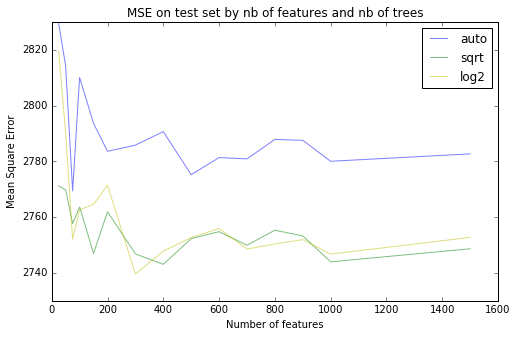

In [19]:
# MSE on test set
fig = plt.gcf()
fig.set_size_inches(8, 5)

for key, co in zip(['auto', 'sqrt', 'log2'], ['b', 'g', 'y']):
    x = randomForest2015[randomForest2015.nb_features == key].nb_trees.values
    y = randomForest2015[randomForest2015.nb_features == key].test_score.values
    plt.plot(x, y, alpha = 0.5, c =co, label = key)

plt.ylabel("Mean Square Error")
plt.xlabel("Number of features")
plt.title("MSE on test set by nb of features and nb of trees")
plt.legend(loc = 1)

plt.show()

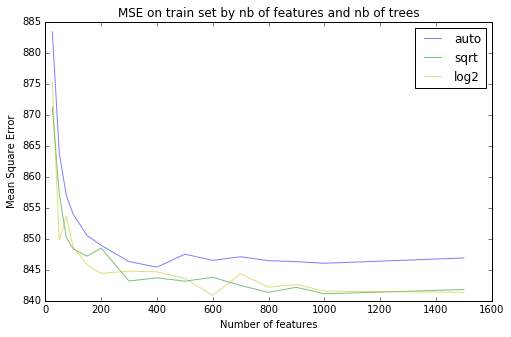

In [20]:
# MSE on train set
fig = plt.gcf()
fig.set_size_inches(8, 5)

for key, co in zip(['auto', 'sqrt', 'log2'], ['b', 'g', 'y']):
    x = randomForest2015[randomForest2015.nb_features == key].nb_trees.values
    y = randomForest2015[randomForest2015.nb_features == key].train_score.values
    plt.plot(x, y, alpha = 0.5, c =co, label = key)

plt.ylabel("Mean Square Error")
plt.xlabel("Number of features")
plt.title("MSE on train set by nb of features and nb of trees")
plt.legend(loc = 1)

plt.show()

In [28]:
dexample.columns

Index(['ARR_DELAY', 'DISTANCE_NOR', 'LAT_NOR', 'LONG_NOR',
       'CRS_ARR_TIME_COR_NOR', 'CRS_DEP_TIME_COR_NOR', 'AIRCRAFT_YEAR_COR_NOR',
       'UNIQUE_CARRIER_AA', 'UNIQUE_CARRIER_B6', 'UNIQUE_CARRIER_NK',
       'UNIQUE_CARRIER_OO', 'UNIQUE_CARRIER_UA', 'ORIGIN_EWR', 'ORIGIN_JFK',
       'ORIGIN_LGA', 'DEST_ORD', 'AIRCRAFT_MFR_0',
       'AIRCRAFT_MFR_AIRBUS                        ',
       'AIRCRAFT_MFR_AIRBUS INDUSTRIE              ',
       'AIRCRAFT_MFR_BEECH                         ',
       'AIRCRAFT_MFR_BOEING                        ',
       'AIRCRAFT_MFR_CESSNA                        ',
       'AIRCRAFT_MFR_CIRRUS DESIGN CORP            ',
       'AIRCRAFT_MFR_EMBRAER                       ',
       'AIRCRAFT_MFR_EMBRAER S A                   ',
       'AIRCRAFT_MFR_GULFSTREAM AEROSPACE          ',
       'AIRCRAFT_MFR_KILDALL GARY                  ',
       'AIRCRAFT_MFR_MCDONNELL DOUGLAS             ',
       'AIRCRAFT_MFR_PIPER                         ',
       'AIRCRAF

## 3.3 Random Forest Classification

We will make prediction on the variable 'ARR_DEL15'. This variable takes the value 1 is the flight is more than 15 minutes late and 0 if not. 

In [29]:
dexample['ARR_DELAY_COR'] = dexample.ARR_DELAY.map(lambda x: (x >= 15))
dexample.drop('ARR_DELAY', axis = 1, inplace = True)
file_path = "dexample_class.csv"
dexample.to_csv(path_or_buf= file_path)
dexample_class = dexample.copy()

In [30]:
dexample_class.head(3)

,DISTANCE_NOR,LAT_NOR,LONG_NOR,CRS_ARR_TIME_COR_NOR,CRS_DEP_TIME_COR_NOR,AIRCRAFT_YEAR_COR_NOR,UNIQUE_CARRIER_AA,UNIQUE_CARRIER_B6,UNIQUE_CARRIER_NK,UNIQUE_CARRIER_OO,...,MONTH_M,MONTH_N,MONTH_O,MONTH_S,DAY_F,DAY_M,DAY_S,DAY_T,DAY_W,ARR_DELAY_COR
4413,1.422153,-2.177843,1.06908,1.03016,-1.246569,-1.221363,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,False
4414,1.422153,-2.177843,1.06908,1.03016,-1.246569,-1.221363,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,False
4415,1.422153,-2.177843,1.06908,1.03016,-1.246569,-1.221363,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,False


The baseline classifier is the classifiers that assign repectively 1 or 0 to 'ARR_DEL15' for every flight.

In [32]:
from __future__ import division

def baseline_class(data, target):
    score_baseline_1 = np.size(data[data[target] == 1][target].values) / np.size(data[target].values)
    score_baseline_0 = np.size(data[data[target] == 0][target].values) / np.size(data[target].values)
    
    print ("baseline classifier everyone to 0: ", int(score_baseline_0*100) , "%")
    print ("baseline classifier everyone to 1: ", int(score_baseline_1*100) , "%")
   
    return score_baseline_0, score_baseline_1

In [33]:
baseline_class(dexample_class, 'ARR_DELAY_COR')

baseline classifier everyone to 0:  78 %
baseline classifier everyone to 1:  21 %


(0.7859912286277252, 0.21400877137227484)

In [34]:
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [35]:
def split(data, list_drop, target, test_size):
    #split the dataset into a training set and a test set
    dtrain, dtest = train_test_split(data, test_size = 0.3)
    
    Xtrain = dtrain.drop(list_drop, axis=1).values
    ytrain = dtrain[target].values
    Xtest = dtest.drop(list_drop, axis=1).values
    ytest = dtest[target].values
    
    return Xtrain, ytrain, Xtest, ytest

In [36]:
def score_random_forest_classifier(Xtrain, ytrain, Xtest, ytest, n_trees=10, max_features='auto'):
    clf= RandomForestClassifier(n_estimators=n_trees, max_features= max_features)
    clf.fit(Xtrain, ytrain)
    
    score_train = clf.score(Xtrain, ytrain)
    score_test = clf.score(Xtest, ytest)
    
    return  score_train, score_test, clf

In [37]:
def best_parameters_classifier(Xtrain, ytrain, Xtest, ytest, nb_trees, nb_features):
    score_tab = pd.DataFrame(columns=['nb_trees', 'nb_features', 'test_score', 'train_score', 'classifier'])
    
    # counter will increment the index in score_tab
    counter = 0 

    for n_estimators in nb_trees:
        for max_features in nb_features:

            score_train, score_test, classifier = \
            score_random_forest_classifier(Xtrain, ytrain, Xtest, ytest, n_trees=n_estimators, max_features=max_features) 
            score_tab.loc[counter] = [n_estimators, max_features, score_test, score_train, classifier]
            counter += 1

    return score_tab

In [38]:
def classify_random_forest_class(data, list_drop, target, test_size=0.4, nb_trees=[10], nb_features = ['auto']):
    Xtrain, ytrain, Xtest, ytest = split(data, list_drop, target, test_size)
    scores =  best_parameters_classifier(Xtrain, ytrain, Xtest, ytest, nb_trees, nb_features)
    return scores

In [39]:
nb_trees = [25, 50, 75, 100, 150, 200, 300, 400, 500, 750, 1000, 2000, 5000]
nb_features = ['sqrt', 'log2']
test_size = 0.4

In [40]:
%%time
randomForest2015_class =  classify_random_forest_class(dexample, ['ARR_DELAY_COR'], 'ARR_DELAY_COR', test_size=test_size, nb_trees=nb_trees, nb_features=nb_features)

CPU times: user 5min 20s, sys: 3min 42s, total: 9min 3s
Wall time: 9min 14s


In [41]:
randomForest2015_class.head()

,nb_trees,nb_features,test_score,train_score,classifier
0,25.0,sqrt,0.745127,0.912104,"(DecisionTreeClassifier(class_weight=None, cri..."
1,25.0,log2,0.744915,0.912013,"(DecisionTreeClassifier(class_weight=None, cri..."
2,50.0,sqrt,0.750847,0.913920,"(DecisionTreeClassifier(class_weight=None, cri..."
3,50.0,log2,0.746398,0.913920,"(DecisionTreeClassifier(class_weight=None, cri..."
4,75.0,sqrt,0.749364,0.914192,"(DecisionTreeClassifier(class_weight=None, cri..."


In [42]:
# save file to /data/ folder
file_path = "randomForest2015_class.csv"
randomForest2015_class.to_csv(path_or_buf= file_path)

Now, we get the importance coefficients which can help use to choose the feature for later linear regression, since our random forest model can be regard as a feature engineering.

In [43]:
features = dexample_class.drop('ARR_DELAY_COR', axis =1).columns
coeffs_class = randomForest2015_class.classifier[len(randomForest2015_class)-1].feature_importances_
u = pd.Series(coeffs_class, index=features)
u.sort(inplace=True, ascending=False)
print (u)

CRS_ARR_TIME_COR_NOR                           0.255373
AIRCRAFT_YEAR_COR_NOR                          0.231586
CRS_DEP_TIME_COR_NOR                           0.230633
DAY_S                                          0.027144
DAY_T                                          0.026648
DAY_F                                          0.025106
DAY_M                                          0.020883
DAY_W                                          0.019330
MONTH_J                                        0.018209
MONTH_A                                        0.015323
MONTH_M                                        0.014296
MONTH_O                                        0.011210
MONTH_F                                        0.010742
MONTH_D                                        0.010434
AIRCRAFT_MFR_AIRBUS INDUSTRIE                  0.009604
MONTH_S                                        0.009564
MONTH_N                                        0.009260
AIRCRAFT_MFR_BOEING                            0

/Applications/Anaconda/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:4: FutureWarning: sort is deprecated, use sort_values(inplace=True) for INPLACE sorting


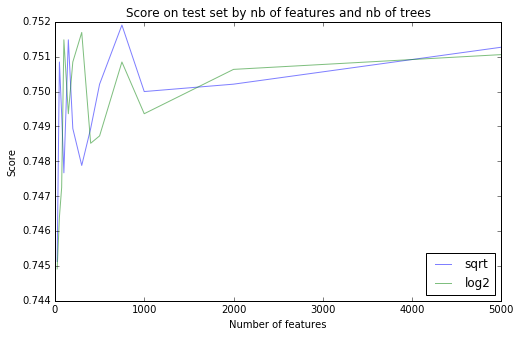

In [44]:
# Score on test set
fig = plt.gcf()
fig.set_size_inches(8, 5)

for key, co in zip(['sqrt', 'log2'], ['b', 'g']):
    x = randomForest2015_class[randomForest2015_class.nb_features == key].nb_trees.values
    y = randomForest2015_class[randomForest2015_class.nb_features == key].test_score.values
    plt.plot(x, y, alpha = 0.5, c =co, label = key)

plt.ylabel("Score")
plt.xlabel("Number of features")
plt.title("Score on test set by nb of features and nb of trees")
plt.legend(loc = 4)

plt.show()

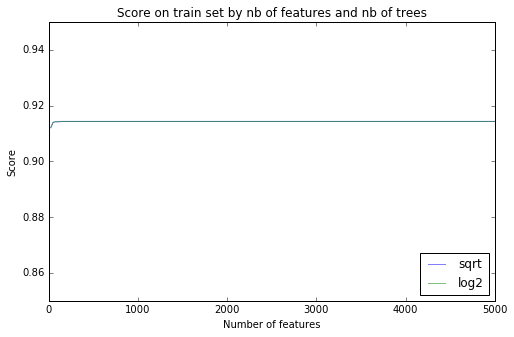

In [54]:
# Score on train set
fig = plt.gcf()
fig.set_size_inches(8, 5)

for key, co in zip(['sqrt', 'log2'], ['b', 'g']):
    x = randomForest2015_class[randomForest2015_class.nb_features == key].nb_trees.values
    y = randomForest2015_class[randomForest2015_class.nb_features == key].train_score.values
    plt.plot(x, y, alpha = 0.5, c =co, label = key)

plt.ylim(0.85, 0.95)
plt.ylabel("Score")
plt.xlabel("Number of features")
plt.title("Score on train set by nb of features and nb of trees")
plt.legend(loc = 4)

plt.show()